In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import tqdm

import matplotlib.pyplot as plt
import cartopy as cart

In [2]:
input_dir_phys = "/nethome/4302001/data/input_data/MOi/psy4v3r1/"
input_dir_deriv = "/nethome/4302001/local_data/psy4v3r1_derivatives/"

In [22]:
clim_path = "/nethome/4302001/local_data/climatology/psy4v3r1/"

In [3]:
t0 = pd.to_datetime("2015-01-01")
t_end = pd.to_datetime("2015-12-31")
t_delta = pd.to_timedelta("1D")
n_d = int((t_end - t0) / t_delta + 1)

In [4]:
str(t0)[:10]

'2015-01-01'

In [20]:
# ds_V = xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_V_{str(t0)[:10]}.nc")
# ds_U = xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_U_{str(t0)[:10]}.nc")

In [15]:
ds_2D = xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_2D_{str(t0)[:10]}.nc").isel(deptht=0)

In [8]:
var2D = ['sossheig', 'sodynhei', 'somxlavt', 'somxlt02', 'somxl010', 'sobarhei', 'sotausrf']

In [14]:
var_drop = ['sosstobs',
 'socelatf',
 'sorunoff',
 'sotaubot',
 'bottomT', 'time_counter']

In [12]:
var_drop

['sosstobs', 'socelatf', 'sorunoff', 'sotaubot', 'bottomT']

In [23]:
for i in tqdm.tqdm(range(n_d)):
    t = t0 + i * t_delta
    if i == 0:
        base_ds = xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_2D_{str(t)[:10]}.nc").isel(deptht=0).drop_vars(var_drop)
        base_ds.close()

    ds_next = xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_2D_{str(t)[:10]}.nc").isel(deptht=0).drop_vars(var_drop)
    
    base_ds += ds_next

    ds_next.close()

ds_avg = base_ds / n_d

ds_avg.to_netcdf(clim_path + f"psy4v3r1-daily_2D_{str(t0)[:10]}_{str(t_end)[:10]}.nc", encoding={var: {"zlib": True, "complevel": 2} for var in var2D})


100%|██████████| 365/365 [11:45<00:00,  1.93s/it]


# KE

In [7]:
# xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_U_{str(t)[:10]}.nc")

In [28]:
for i in tqdm.tqdm(range(n_d)):
    t = t0 + i * t_delta
    if i == 0:
        base_ds = xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_U_{str(t)[:10]}.nc").isel(deptht=0)
        KE_base = base_ds.vozocrtx * 0
        base_ds.close()
    
    ds_U = xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_U_{str(t)[:10]}.nc").isel(deptht=0)
    ds_V = xr.open_dataset(input_dir_phys + f"psy4v3r1-daily_V_{str(t)[:10]}.nc").isel(deptht=0)

    KE_base = KE_base + 0.5 * (ds_U.vozocrtx**2 + ds_V.vomecrty**2)

    ds_U.close()
    ds_V.close()

KE_base = KE_base / n_d


        

100%|██████████| 365/365 [09:10<00:00,  1.51s/it]


In [34]:
ds_KE = KE_base.to_dataset(name="KE")

In [35]:
ds_KE.to_netcdf(clim_path + f"psy4v3r1-daily_KE_{str(t0)[:10]}_{str(t_end)[:10]}.nc", encoding={"KE": {"zlib": True, "complevel": 2}})

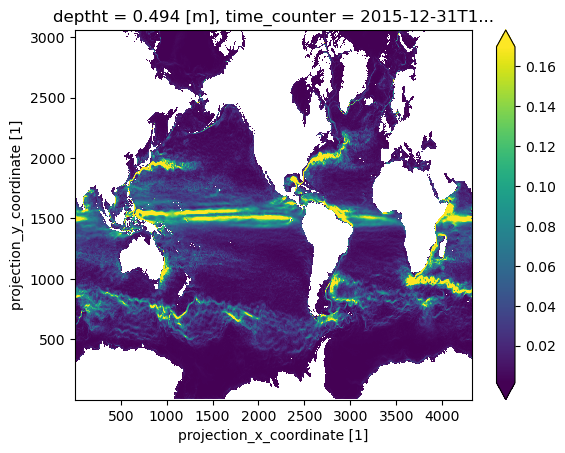

In [31]:
KE_base.plot(robust=True)

# Derivatives

In [44]:
base_ds = xr.open_dataset(input_dir_deriv + f"psy4v3r1_velocity_derivatives_{str(t)[:10]}.nc")


In [ ]:
for i in tqdm.tqdm(range(n_d)):
    t = t0 + i * t_delta
    if i == 0:
        base_ds = xr.open_dataset(input_dir_deriv + f"psy4v3r1_velocity_derivatives_{str(t)[:10]}.nc")   
    else:
        ds_temp = xr.open_dataset(input_dir_deriv + f"psy4v3r1_velocity_derivatives_{str(t)[:10]}.nc")
        base_ds = base_ds + ds_temp
        ds_temp.close()

clim_ds = base_ds / n_d


In [48]:
clim_ds.to_netcdf(clim_path + f"psy4v3r1-daily_derivatives_{str(t0)[:10]}_{str(t_end)[:10]}.nc", encoding={var: {"zlib": True, "complevel": 2} for var in ["dudx", "dudy", "dvdx", "dvdy"]})   